##Exploratory Data Analysis

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
df = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = df.data.features
y = df.data.targets

# metadata
print(df.metadata)

# variable information
print(df.variables)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

In [3]:
import pandas as pd
df = pd.concat([X, y], axis=1)

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
print(y.value_counts())

NObeyesdad         
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [7]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


##Normalizing Features and Preprocessing

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# feature groups
categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS']
binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first'), categorical_cols),
    (StandardScaler(), numeric_cols),
    remainder='passthrough'  # keeps binary as-is
)

X[binary_cols] = X[binary_cols].replace({'yes': 1, 'no': 0})


X_preprocessed = preprocessor.fit_transform(X)
# Get feature names from the preprocessor
feature_names = (
    preprocessor.named_transformers_['onehotencoder']
    .get_feature_names_out(categorical_cols).tolist()
    + numeric_cols
    + binary_cols
)

le = LabelEncoder()
y = le.fit_transform(df['NObeyesdad'])
y_df = pd.DataFrame(y, columns=['NObeyesdad_num'])

# Convert to DataFrame
X_df = pd.DataFrame(X_preprocessed, columns=feature_names)

/tmp/ipython-input-4167771736.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[binary_cols] = X[binary_cols].replace({'yes': 1, 'no': 0})


In [10]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}


In [11]:
full_df = pd.concat([X_df, y_df], axis=1)

In [12]:
full_df.head()

,Gender_Male,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,...,FCVC,NCP,CH2O,FAF,TUE,family_history_with_overweight,FAVC,SMOKE,SCC,NObeyesdad_num
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.785019,0.404153,-0.013073,-1.188039,0.561997,1.0,0.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.088342,0.404153,1.618759,2.339750,-1.080625,1.0,0.0,1.0,1.0,1
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,0.0,0.0,0.0,1
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.088342,0.404153,-0.013073,1.163820,-1.080625,0.0,0.0,0.0,0.0,5
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,0.0,0.0,0.0,0.0,6


##Correlations and Charts

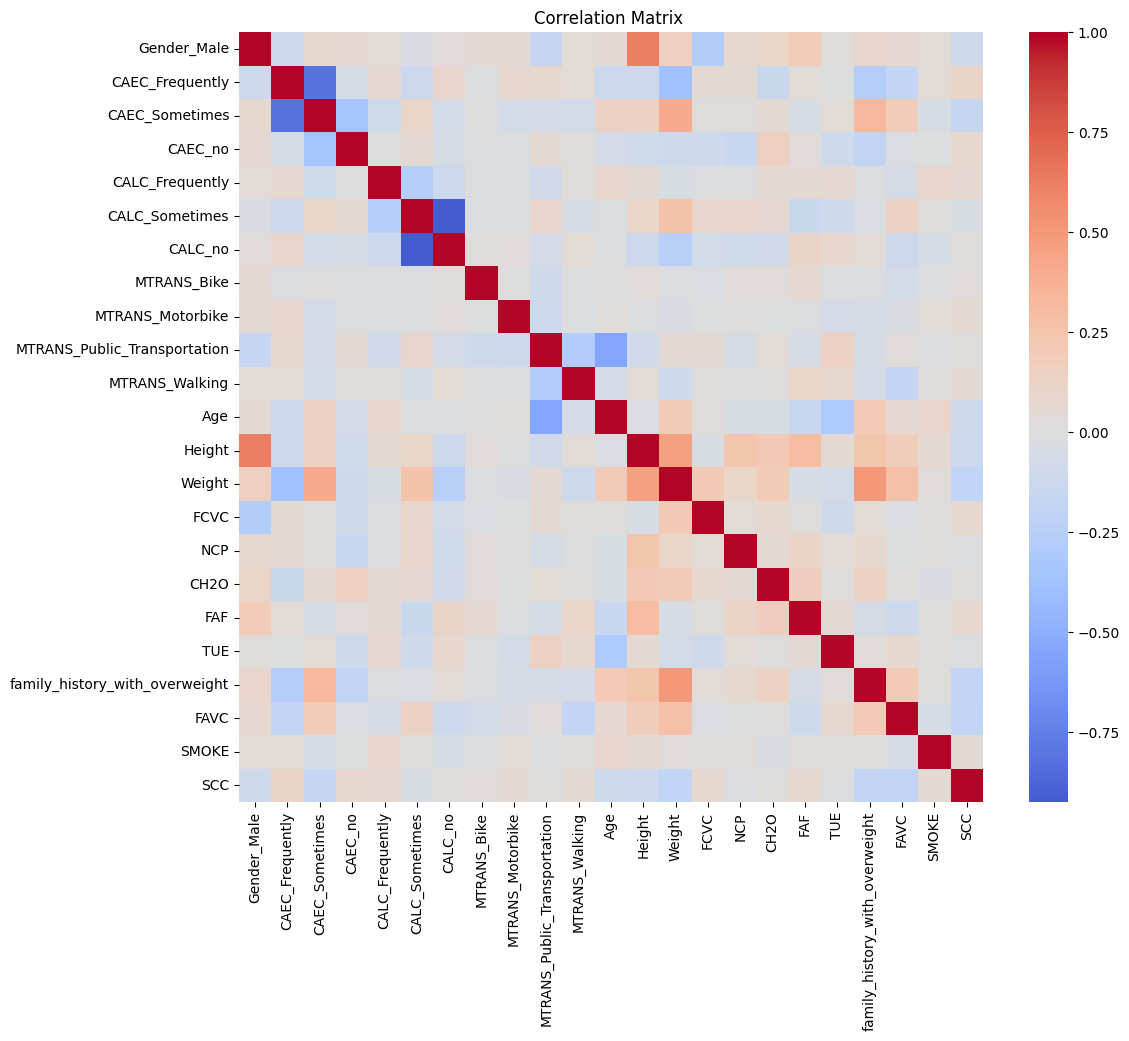

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = X_df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix ")
plt.show()

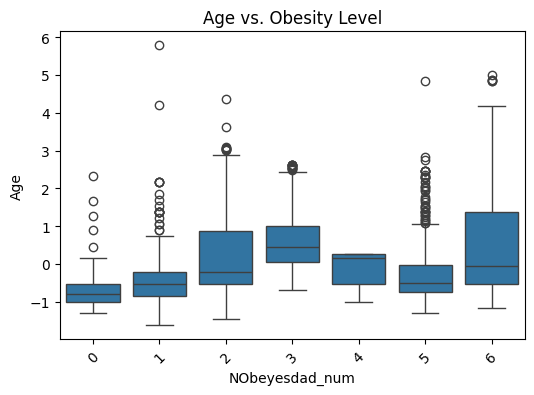

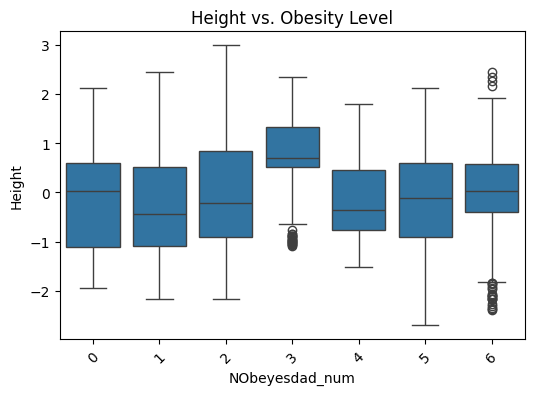

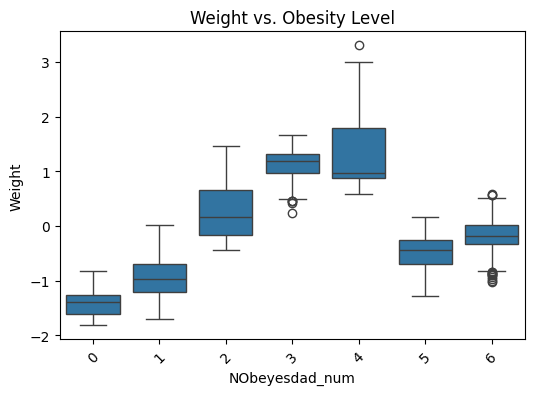

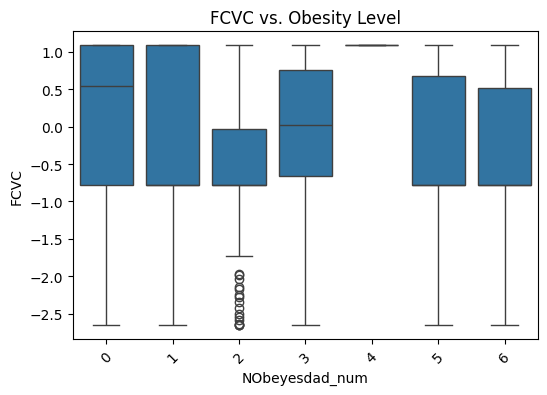

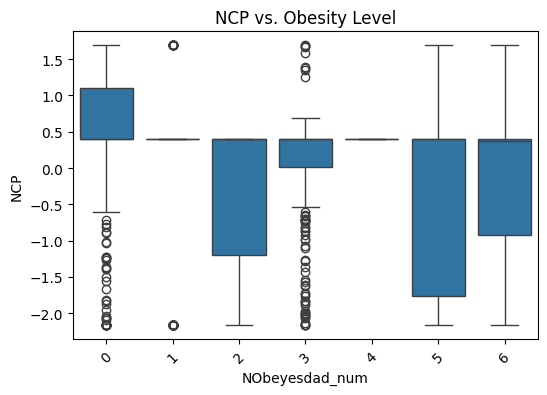

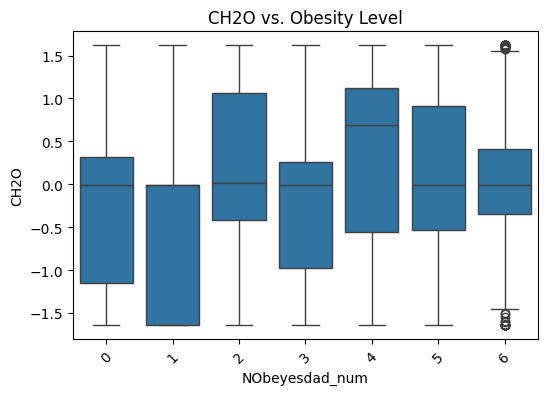

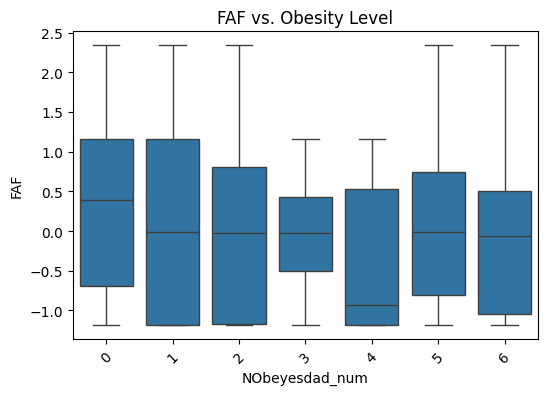

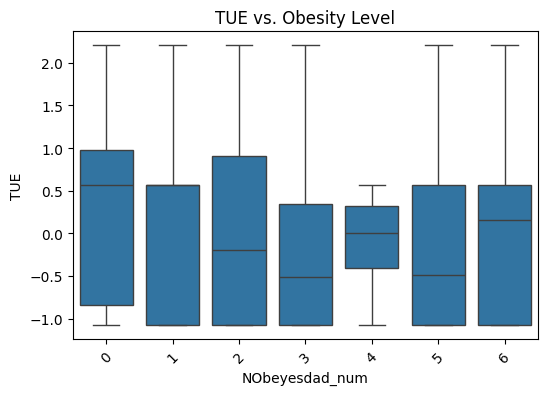

In [14]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=full_df, x='NObeyesdad_num', y=col)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs. Obesity Level')
    plt.show()

In the categorical columns, the values aren't distributed equally among options. we need to figure out a way to make sure this doesn't affect the mdoel terribly

Weight                            0.387643
CAEC_Sometimes                    0.316962
family_history_with_overweight    0.313667
Age                               0.236170
CALC_Sometimes                    0.114104
CH2O                              0.108868
CAEC_no                           0.066715
CALC_Frequently                   0.047318
FAVC                              0.044582
Height                            0.038986
Gender_Male                       0.024908
FCVC                              0.018522
MTRANS_Public_Transportation     -0.003748
MTRANS_Bike                      -0.017351
SMOKE                            -0.023256
MTRANS_Motorbike                 -0.034293
SCC                              -0.050679
TUE                              -0.069448
MTRANS_Walking                   -0.073823
NCP                              -0.092616
FAF                              -0.129564
CALC_no                          -0.134716
CAEC_Frequently                  -0.351827
Name: NObey

/tmp/ipython-input-8549613.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette="coolwarm")


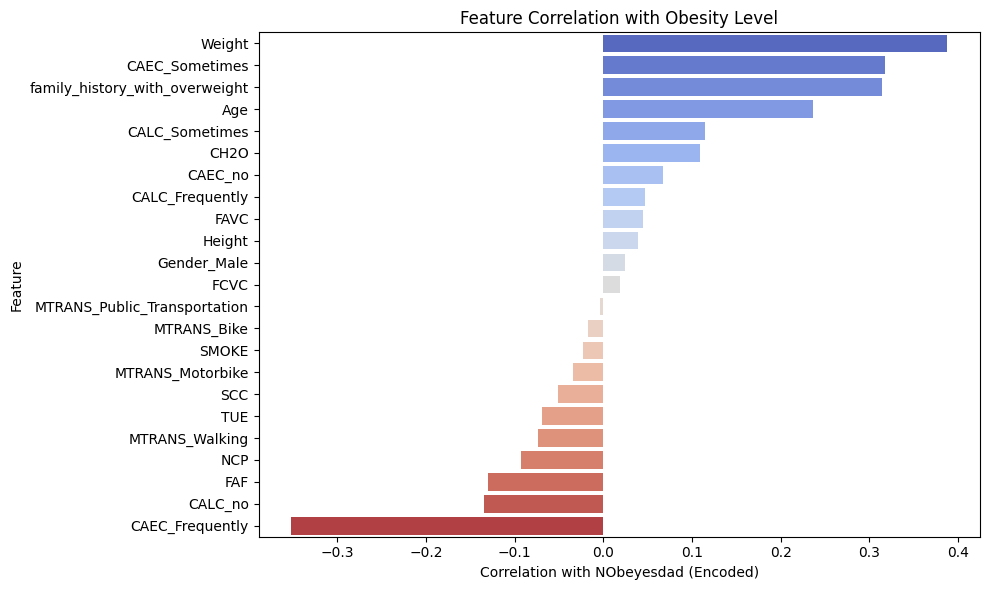

In [15]:
correlations_with_target = (
    full_df.corr(numeric_only=True)['NObeyesdad_num']
    .drop('NObeyesdad_num')
    .sort_values(ascending=False)
)
print(correlations_with_target)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette="coolwarm")
plt.title("Feature Correlation with Obesity Level")
plt.xlabel("Correlation with NObeyesdad (Encoded)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Building Models without Feature Engineering
Logistic Regression and KNN

In [16]:
from sklearn.model_selection import train_test_split

# X = df.drop('NObeyesdad_num', axis=1)
# y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42, stratify=y
)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

log_reg = LogisticRegression(max_iter=1000, multi_class='multinomial')
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Results
Accuracy: 0.8794326241134752
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        54
           1       0.83      0.76      0.79        58
           2       0.88      0.93      0.90        70
           3       0.95      0.97      0.96        60
           4       1.00      0.98      0.99        65
           5       0.74      0.74      0.74        58
           6       0.80      0.76      0.78        58

    accuracy                           0.88       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.88      0.88      0.88       423



In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Classifier Results
Accuracy: 0.8392434988179669
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        54
           1       0.79      0.52      0.62        58
           2       0.79      0.96      0.86        70
           3       0.95      0.97      0.96        60
           4       0.98      1.00      0.99        65
           5       0.76      0.67      0.72        58
           6       0.75      0.78      0.76        58

    accuracy                           0.84       423
   macro avg       0.84      0.83      0.83       423
weighted avg       0.84      0.84      0.83       423



/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
